In [2]:
%matplotlib inline
#importar librerias relevantes
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Actividades de clase, semanas 4, 5 y 6.


<p style="text-align: left;"><span style="color: #000000;">Grupo 1:</span></p>
<ul>
<li style="text-align: left;"><span style="color: #000000;">Felipe Bedoya Casta&ntilde;o</span></li>
<li style="text-align: left;"><span style="color: #000000;">Mirai Alejandro Kaneko</span></li>
<li style="text-align: left;"><span style="color: #000000;">Alejandro Giraldo Sarria</span></li>
<li style="text-align: left;"><span style="color: #000000;">Marianela Arcila</span></li>
</ul>

# Módulo I

## 1.

Lea la imagen "gato.jpg" que se encuentra en la carpeta "res", en escala de grises.

A continuación, mediante transformaciones geométricas de reflexión y rotación obtenga lo siguiente:

<img src="res/transformacion.png">

NOTA: Usted debe presentar dos resultados, uno de ellos aplicando una reflexión directamente, y el otro aplicando una rotación inicialmente.

<h1>SOLUCION</h1>

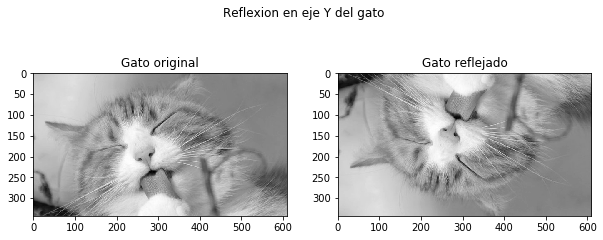

In [38]:
#Relfexion del gato en Y
gato = cv2.imread('res/gato.jpg',cv2.IMREAD_GRAYSCALE)
filas, columnas = gato.shape

refymatrix = np.float32([[1,0,0],[0,-1,filas]])
refy = cv2.warpAffine(gato,refymatrix,(columnas,filas))

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
fig.suptitle('Reflexion en eje Y del gato')
ax1.set_title('Gato original')
ax2.set_title('Gato reflejado')
ax1.imshow(gato,cmap='gray')
ax2.imshow(refy,cmap='gray');

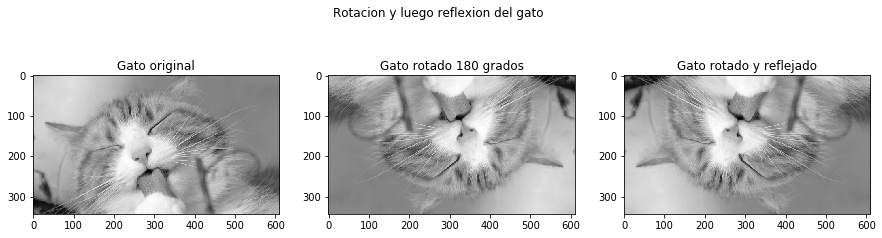

In [47]:
#Rotacion 180 grados del gato

theta = 180

#Eje de rotacion
axis = (columnas/2,filas/2)

rotmatrix = cv2.getRotationMatrix2D(axis,theta,1)

rotated = cv2.warpAffine(gato,rotmatrix,(columnas,filas))

#Reflexion del gato
xmatrix = np.float32([[-1,0,columnas],[0,1,0]])
refx = cv2.warpAffine(rotated,xmatrix,(columnas,filas))

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,4))
fig.suptitle('Rotacion y luego reflexion del gato')

ax1.set_title('Gato original')
ax2.set_title('Gato rotado 180 grados')
ax3.set_title('Gato rotado y reflejado')
ax1.imshow(gato,cmap='gray')
ax2.imshow(rotated,cmap='gray')
ax3.imshow(refx,cmap='gray');

## 2.

Utilice la imagen obtenida en el primer punto, a continuación, mediante la transformación inclinación, con ix = iy = -0.2, obtenga:

<img src = "res/incli.png">

<h1>SOLUCION</h1>

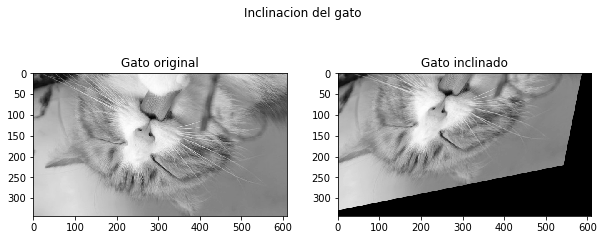

In [37]:
#Inclinacion

ix = iy = -0.2

matrix = np.float32([[1,ix,0],[iy,1,0]])

incline = cv2.warpAffine(refx,matrix,(columnas,filas))

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
fig.suptitle('Inclinacion del gato')
ax1.set_title('Gato original')
ax2.set_title('Gato inclinado')
ax1.imshow(refx,cmap='gray')
ax2.imshow(incline,cmap='gray');

## 3.

Utilizando la imagen obtenida, en el punto 2, lea la imagen "mascara2.png" que se encuentra en la carpeta "res", a continuación utilice una operación entre imágenes para obtener la imagen que se muestra a continuación:

<img src = "res/ress.png">

Posteriormente, mediante una operación rotación obtenga:

<img src = "res/rot2.png">

Finalmente, pruebe rotando primero la imagen y posteriormente aplicando la operación. ¿Son los resultados iguales? ¿Qué puede concluir al respecto?

<h1>SOLUCION</h1>

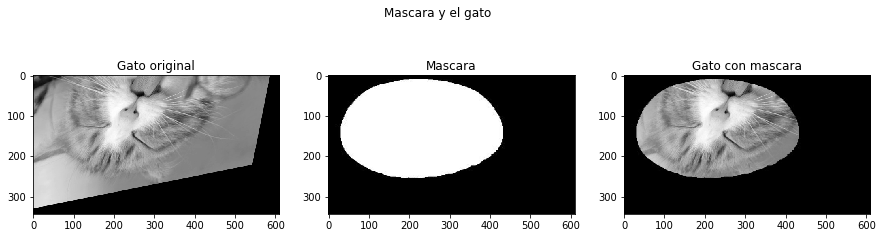

In [46]:
#Mascara a gato inclinado
mascara = cv2.imread('res/mascara2.png',cv2.IMREAD_GRAYSCALE)/255
mascara = cv2.resize(mascara,(columnas,filas))
out = incline*mascara
out = out/255

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,4))
fig.suptitle('Mascara y el gato')

ax1.set_title('Gato original')
ax2.set_title('Mascara')
ax3.set_title('Gato con mascara')
ax1.imshow(incline,cmap='gray')
ax2.imshow(mascara,cmap='gray')
ax3.imshow(out,cmap='gray');

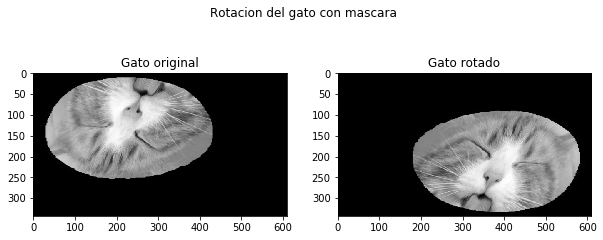

In [49]:
#rotacion 180 grados
inclinerotated = cv2.warpAffine(out,rotmatrix,(columnas,filas))

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
fig.suptitle('Rotacion del gato con mascara')
ax1.set_title('Gato original')
ax2.set_title('Gato rotado')
ax1.imshow(out,cmap='gray')
ax2.imshow(inclinerotated,cmap='gray');

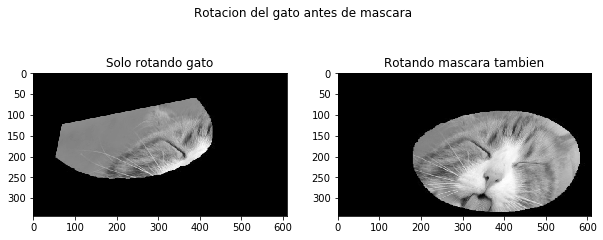

In [54]:
#rotando primero
rotatedfirst = cv2.warpAffine(incline,rotmatrix,(columnas,filas))

outr = rotatedfirst*mascara
outr = outr/255

rotatedmascara = cv2.warpAffine(mascara,rotmatrix,(columnas,filas))

outrmascara = rotatedfirst*rotatedmascara
outrmascara = outrmascara/255

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
fig.suptitle('Rotacion del gato antes de mascara')
ax1.set_title('Solo rotando gato')
ax2.set_title('Rotando mascara tambien')
ax1.imshow(outr,cmap='gray')
ax2.imshow(outrmascara,cmap='gray');

# Módulo II

## 1.

Es posible realizar transformaciones no lineales sobre una imagen, tales como la parábola y la raíz cuadrada mostradas en la clase. De forma análoga implemente un algoritmo donde la transformación no lineal corresponda a una función exponencial. 

<br><center>$a*exp(bx+c)$ </center></br>

Donde a,b y c son constantes.

<br> Para realizar este ejercicio, lea la imagen "calabazas.png" que se encuentra en la carpeta "res" </br>

<b> Sugerencia: Utilice los ejemplos de clase como referencia para aplicar una transformación no lineal sobre la imagen, recuerde variar los parámetros a,b y c para obtener resultados distintos y poder concluir. </b>

<h1>SOLUCION</h1>

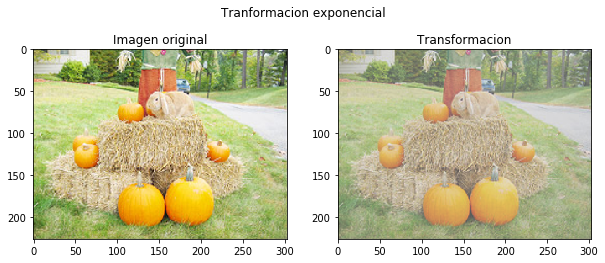

In [123]:
#Funcion exponencial

def f_onimg(img,f,args):
    
    res = np.zeros(img.shape,np.uint8)
    res[:,:,0] = f(img[:,:,0], *args)
    res[:,:,1] = f(img[:,:,1], *args)
    res[:,:,2] = f(img[:,:,2], *args)
    
    return res

def exponential_transform(img,a,b,c):
    
    imgcopy = img.copy().astype(np.float32)/255.0
    
    res = cv2.multiply(imgcopy,b)
    res = cv2.add(res,c)
    for i in range(0,imgcopy.shape[0]):
        for j in range(0,imgcopy.shape[1]):
            res[i,j] = np.power(np.e,res[i,j])
    
    res = cv2.multiply(res,a)
    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255
    
    return res

img = cv2.imread('res/calabazas.png',cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

a = 0.3
b = 1
c = 0.1


transformed = f_onimg(img,exponential_transform,[a,b,c])

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
fig.suptitle('Tranformacion exponencial')
ax1.set_title('Imagen original')
ax2.set_title('Transformacion')
ax1.imshow(img)
ax2.imshow(transformed);

## 2.

Lea la imagen "eiffel.png" que se encuentra en la carpeta "res", implemente la ecualización exponencial y la ecualización de Rayleigh, posteriormente compare las imágenes modificadas y los histogramas obtenidos.

<br><b>Ecualización exponencial</b></br>

<img src = res/expo.png>

<br><b>Ecualización de Rayleigh</b></br>

<img src = res/ray.png>

Recuerde que $ln(0)$ representa una indeterminación, por lo tanto es sugerible sumar un valor $epsilon$ muy pequeño ($1e-5$ o menor) al argumento del logaritmo natural.

<br><b> Sugerencia: Una imagen saturada implica pérdida de información, por lo tanto deben utilizarse parámetros $alpha$ adecuados en cada caso. </b><br>

<h1>SOLUCION</h1>

C:\Users\Mirai\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\Mirai\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
C:\Users\Mirai\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


<Figure size 432x288 with 0 Axes>

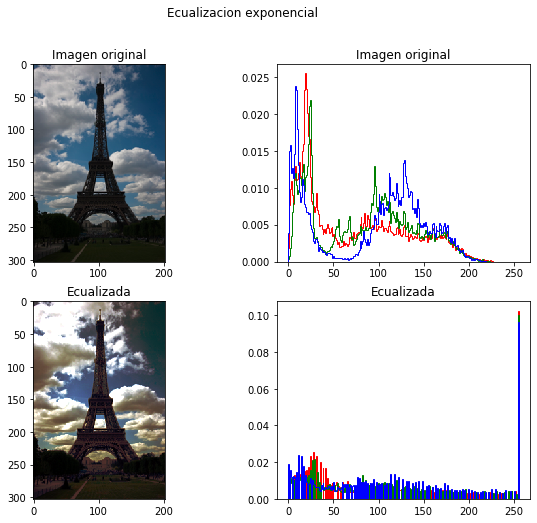

In [147]:
#Ecualizacion exponencial
def equalization_exp(img,alpha):
    
    res = np.zeros(img.shape,np.float32)
    raveled = img.ravel()
    hist_norm = plt.hist(raveled,bins=255,range=(0.0,255.0), normed=True)
    plt.clf()
    pdf = hist_norm[0]
    np.append(pdf,1.0-np.sum(pdf))
    cdf = [np.sum(pdf[0:x]) for x in range(0,256)]
    gmin = np.min(img)
    gmax = np.max(img)
    
    for g in range(0,256):
        res[img == g] = -gmin -(1/alpha)*np.log(1-cdf[g]+0.000001)*(gmax-gmin)
    res[res<0] = 0
    res[res>255] = 255
    res = res.astype(np.uint8)
    return res

img = cv2.cvtColor(cv2.imread('res/eiffel.png'),cv2.COLOR_BGR2RGB)

alpha = 2

res = f_onimg(img,equalization_exp,[alpha])

fig, (ax1,ax2) = plt.subplots(2,2,figsize=(10,8))
fig.suptitle('Ecualizacion exponencial')
ax1[0].set_title('Imagen original')
ax2[0].set_title('Ecualizada')
ax1[1].set_title('Imagen original')
ax2[1].set_title('Ecualizada')
ax1[0].imshow(img)
ax2[0].imshow(res)
for i, col in enumerate(colors):
    imgarray = img[:,:,i].ravel()
    ax1[1].hist(imgarray,histtype='step',bins=255,
             range=(0.0,255.0),normed=True,color=colors[i])
for i, col in enumerate(colors):
    imgarray = res[:,:,i].ravel()
    ax2[1].hist(imgarray,histtype='step',bins=255,
             range=(0.0,255.0),normed=True,color=colors[i]);

C:\Users\Mirai\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  
C:\Users\Mirai\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in power
  from ipykernel import kernelapp as app
C:\Users\Mirai\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in less
  app.launch_new_instance()
C:\Users\Mirai\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in greater
C:\Users\Mirai\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
C:\Users\Mirai\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will b

<Figure size 432x288 with 0 Axes>

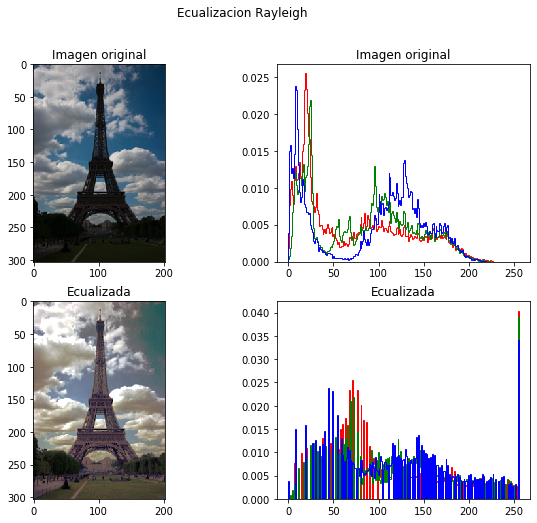

In [159]:
#Ecualizacion rayleigh
def equalization_ray(img,alpha):
    
    res = np.zeros(img.shape,np.float32)
    raveled = img.ravel()
    hist_norm = plt.hist(raveled,bins=255,range=(0.0,255.0), normed=True)
    plt.clf()
    pdf = hist_norm[0]
    np.append(pdf,1.0-np.sum(pdf))
    cdf = [np.sum(pdf[0:x]) for x in range(0,256)]
    gmin = np.min(img)
    gmax = np.max(img)
    
    for g in range(0,256):
        res[img == g] = gmin + np.power(-2*alpha*alpha*np.log(1-cdf[g]+0.000001),0.5)*(gmax-gmin)
    res[res<0] = 0
    res[res>255] = 255
    res = res.astype(np.uint8)
    return res

alpha = 0.45

res = f_onimg(img,equalization_ray,[alpha])

fig, (ax1,ax2) = plt.subplots(2,2,figsize=(10,8))
fig.suptitle('Ecualizacion Rayleigh');
ax1[0].set_title('Imagen original');
ax2[0].set_title('Ecualizada');
ax1[1].set_title('Imagen original');
ax2[1].set_title('Ecualizada');
ax1[0].imshow(img);
ax2[0].imshow(res);
for i, col in enumerate(colors):
    imgarray = img[:,:,i].ravel()
    ax1[1].hist(imgarray,histtype='step',bins=255,
             range=(0.0,255.0),normed=True,color=colors[i]);
for i, col in enumerate(colors):
    imgarray = res[:,:,i].ravel()
    ax2[1].hist(imgarray,histtype='step',bins=255,
             range=(0.0,255.0),normed=True,color=colors[i]);

## 3.

Lea la imagen "gatonegro.jpg" que se encuentra en la carpeta "res", a continuación aplique una transformación gamma, donde pueda, variando los parámetros a y gamma, concluir acerca del comportamiento de la imagen con esta transformación aplicada.

Recuerde que la transformación gamma viene dada por:

<center><h3>$f(x)= ax^\gamma$</h3></center>

<img src="res/gamma.png">

¿Qué sucede si 0 < gamma < 1? ¿Qué sucede si gamma > 1? Debe mostrar los resultados obtenidos.
<h1>SOLUCION</h1>

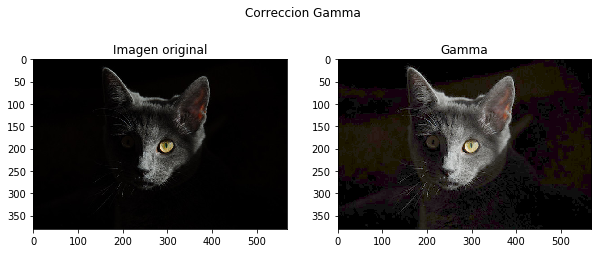

In [165]:
#Correccion gamma

def gamma_correction(img,a,gamma):
    
    imgcopy = img.copy().astype(np.float32)/255.0
    
    res = cv2.pow(imgcopy,gamma)
    res = cv2.multiply(res,a)
    
    res[res<0] = 0
    res = res*255.0
    res[res>255] = 255
    
    res = res.astype(np.uint8)
    
    return res

gatonegro = cv2.cvtColor(cv2.imread('res/gatonegro.jpg'),cv2.COLOR_BGR2RGB)

a = 1
gamma = 0.5

gammacorrected = f_onimg(gatonegro,gamma_correction,[a,gamma])

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
fig.suptitle('Correccion Gamma')
ax1.set_title('Imagen original')
ax2.set_title('Gamma')
ax1.imshow(gatonegro)
ax2.imshow(gammacorrected);

# Módulo III

# 1.

Cree una imagen artificial utilizando la siguiente matriz:

$$I = \begin{bmatrix}
255 & 255 & 0 \\
255 & 0 & 255 \\
0 & 255 & 255 \end{bmatrix}
$$

Adicionalmente, cree la siguiente máscara:
    
$$Máscara = \begin{bmatrix}
1/2 & 1/2 & 1/2 \\
1/2 & 1/2 & 1/2 \\
1/2 & 1/2 & 1/2 \end{bmatrix}
$$

Mediante la operación de convolución, muestre, el resultado de la convolución sobre la posición (1,1) de la matriz.

Ayuda: Debería obtener un resultado como el siguiente:

<img src= "res/ayuda.png">

<h1>SOLUCION</h1>

127.5
255.0
255.0
382.5
382.5
510.0
510.0
637.5
765.0
[[  0   0   0]
 [  0 253   0]
 [  0   0   0]]


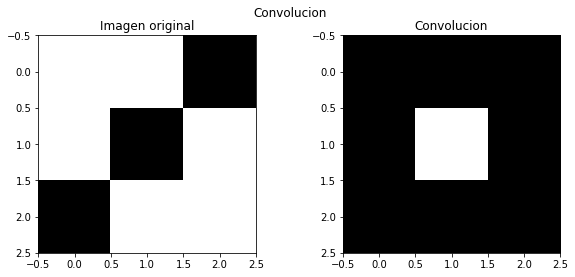

In [177]:
img = np.array([[255,255,0],
               [255,0,255],
               [0,255,255]],dtype=np.uint8)

mask = np.array([[1/2,1/2,1/2],
                [1/2,1/2,1/2],
                [1/2,1/2,1/2]],dtype=np.float64)

k = 1
res = np.zeros(img.shape,dtype=np.float64)

for i in range(-k,k+1):
    for j in range(-k,k+1):
        res[1][1] += img[1+i][1+j] * mask[k+i][k+j]
        print(res[1][1])

res = res.astype(np.uint8)

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
fig.suptitle('Convolucion')
ax1.set_title('Imagen original')
ax2.set_title('Convolucion')
ax1.imshow(img,cmap='gray')
ax2.imshow(res,cmap='gray');
print(res)